# Redes de Kohonen

- Kohonen, 1982.
- Tipo de red neuronal que se auto-organiza utilizando aprendizaje competitivo.
- Las neuronas se distribuyen espacialmente como los nodos de una malla típicamente uni- o bi-dimensional.
- El resultado final es un mapa auto-organizado (SOM): un mapa topográfico de los patrones de entrada en el cual la localización espacial de las neuronas de la red codifica las propiedades estadísticas de estos patrones.
- Inspiración biológica: diversas estructuras cerebrales están organizadas de un modo similar: los estímulos sensoriales se mapean a diferentes áreas de la corteza cerebral de una manera topológicamente ordenada. Ejemplos: estímulos táctiles, acústicos o visuales (p.ej. Hubel and Wiesel 1962, 1977).
- La red aprende de manera no supervisada. El objetivo del aprendizaje es conseguir que las neuronas que codifican información similar o relacionada ocupen posiciones espaciales próximas.
- Modelo previo de Willshaw y von der Malsburg, 1976 (mapeo retinotópico de la retina a la corteza en los vertebrados). Este modelo se basa en mecanismos de excitación en un rango cercano e inhibición en un rango más largo (cooperación entre neuronas próximas y competición entre neuronas distantes).


### El modelo de Kohonen

- Algoritmo de tipo vector coding: la red proporciona una codificación de la entrada.
- Se transforma la señal de entrada en un mapa en 1 o 2 dimensiones.
- Las neuronas del mapa están ordenadas de acuerdo a características de la entrada.
- Todas las neuronas del mapa están conectadas con todas las entradas.
- Cuando una neurona aprende facilita el aprendizaje de sus vecinas, de modo que neuronas próximas aprenden patrones similares.

&nbsp;

#### El algoritmo de aprendizaje de la red se puede resumir de la siguiente manera:

&nbsp;

PASO 1. Inicialización de la red: las neuronas se distribuyen en una malla (uni o bidimensional). Todas las neuronas están inicialmente conectadas con todas las entradas con pesos aleatorios.

&nbsp;

PASO 2. Muestreo: se elige un patrón de entrada, $\mathbf{x}$.

&nbsp;

PASO 3. Activación de la red y selección de la neurona ganadora: el patrón $\mathbf{x}$ se introduce a la red y se calcula la activación de las neuronas como $y_{j} = \mathbf{w}_{j}^{T} \mathbf{x}$, donde $j$ representa el índice de la neurona. La neurona que más se activa es la neurona ganadora. En la práctica se selecciona la neurona $i(\mathbf{x})$ cuyos pesos $\mathbf{w}_{j}$ son más parecidos a la entrada $\mathbf{x}$ de acuerdo a la distancia euclidea:

$$
i(\mathbf{x}) = \arg\min_{j} ||\mathbf{x} - \mathbf{w}_{j}||
$$

Esto es equivalente a lo anterior si los vectores son unitarios.
  
&nbsp;

PASO 4. Actualización de los pesos de la neurona $i(\mathbf{x})$ y sus vecinas de acuerdo a la expresión:

$$
\mathbf{w}_{j} \leftarrow \mathbf{w}_{j} + \eta h_{j, i(\mathbf{x})} (\mathbf{x} - \mathbf{w}_{j})
$$

En la expresión anterior $\eta$ es el factor de aprendizaje y $h_{j, i(\mathbf{x})}$ es una máscara gausiana centrada en $i(\mathbf{x})$:

$$
h_{j, i(\mathbf{x})} = \exp(-\frac{d_{j, i}^{2}}{2 \sigma^{2}})
$$

Donde $d_{j, i}$ es la distancia euclidea (en la malla) entre las neuronas $i$ y $j$. Así, la neurona que más aprende es siempre la neurona ganadora $i(\mathbf{x})$, a continuación sus vecinas más proximas, y así sucesivamente con un decrecimiento gausiano. El aprendizaje consiste en hacer los pesos más parecidos al patrón de entrada $\mathbf{x}$, de modo que la siguiente vez que se presente el patrón a la red la neurona se active más.

&nbsp;

PASO 5: Vuelta al paso 2.

&nbsp;

A continuación se muestran varios ejemplos.

### Ejemplo inicial:

Vamos a empezar con un ejemplo sencillo. Consideremos un conjunto de entradas consistentes en vectores en 2D: $\mathbf{x} = (x_{1}, x_{2})$. Cada una de las componentes de $\mathbf{x}$ se distribuye uniformemente en el intervalo $\{0, 1\}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
npats = 500
dim = 2
x = np.random.rand(dim, npats)

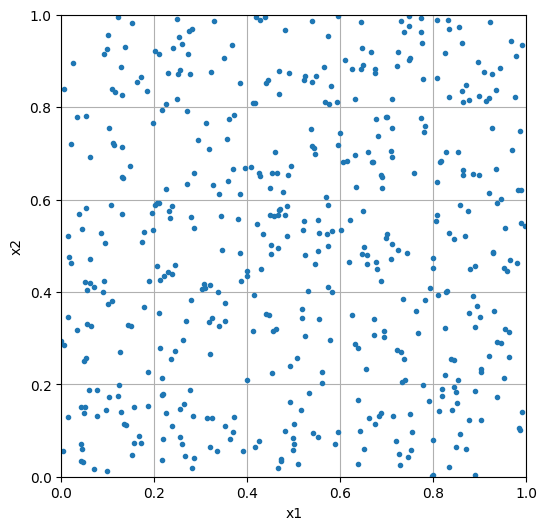

In [3]:
plt.figure(figsize=(6,6))

plt.plot(x[0], x[1], '.')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")

plt.axis([0, 1, 0, 1])

plt.show()

### 1. Inicialización de los pesos:

Todas las neuronas de la red (malla) están conectadas con todas las neuronas (variables) de entrada. Por tanto necesitamos una matriz de pesos de dimensiones $2 \times N$, con $N$ el número de neuronas de la red. Como ejemplo inicial vamos a considerar una red de $4 \times 8$ neuronas ($32$ en total).

In [4]:
nx = 8
ny = 4

Las neuronas de la red deben estar situadas en una malla $ny \times nx$ ($4 \times 8$ en este caso). La función ``init_network`` inicializa la red creando la malla y estableciendo los valores de los pesos aleatoriamente:

In [5]:
def init_network(nx, ny, dim):
  posx = np.arange(nx)[None, :]*np.ones((ny, 1))
  posy = np.arange(ny)[:, None]*np.ones((1, nx))

  pos = np.dstack((posx, posy))

  w = np.random.rand(ny, nx, dim)

  return pos, w

La función devuelve las posiciones x e y de cada neurona en la malla y los pesos:

In [6]:
pos, w = init_network(nx, ny, dim)
print(pos.shape)
print(w.shape)

(4, 8, 2)
(4, 8, 2)


Nótese que la matriz de posiciones tiene dimensiones $ny \times nx \times 2$ (posiciones x e y de cada neurona en la malla), mientras que la matriz de pesos tiene dimensiones $ny \times nx \times dim$ (dimensión de la entrada).

La siguiente celda de código pinta cada neurona en su posición dentro de la malla:

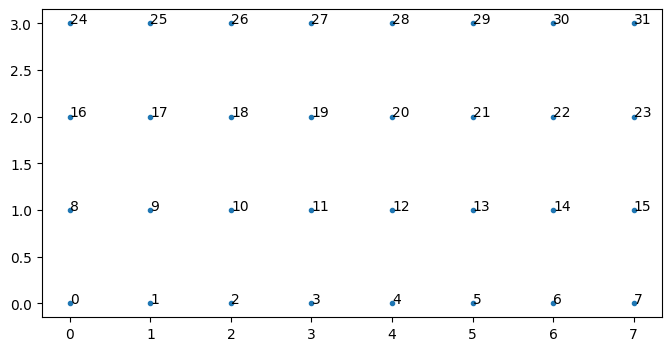

In [7]:
xx = pos[:, :, 0].ravel()
yy = pos[:, :, 1].ravel()

plt.figure(figsize=(8, 4))
plt.plot(xx, yy, '.')

for i in range(nx*ny):
  plt.annotate("%d" % i, (xx[i], yy[i]))
plt.show()

Y a continuación representamos los pesos de cada neurona como un punto en dos dimensiones:

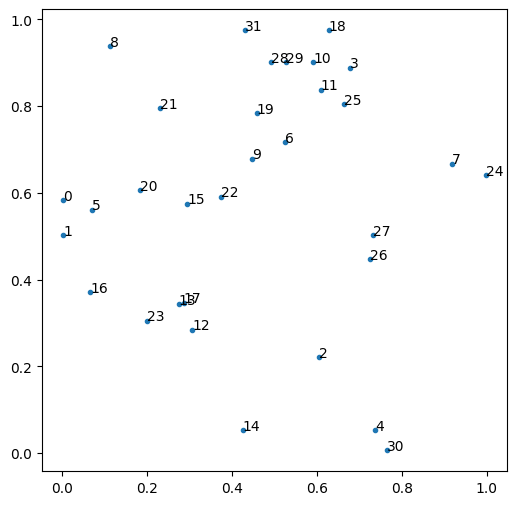

In [8]:
wx = w[:, :, 0].ravel()
wy = w[:, :, 1].ravel()

plt.figure(figsize=(6, 6))
plt.plot(wx, wy, '.')

for i in range(nx*ny):
  plt.annotate("%d" % i, (wx[i], wy[i]))
plt.show()

Como puede verse, inicialmente no hay una relación aparente entre la posición que ocupa una neurona en la malla y el peso de la misma. El objetivo del aprendizaje es conseguir que dos neuronas que están próximas espacialmente (en la malla) tengan pesos similares, y por tanto respondan a estímulos parecidos.

### 2. Competición entre neuronas:

Antes de continuar vamos a aumentar la complejidad de la red, considerando una malla de $32 \times 32$ neuronas ($1024$ en total).

In [9]:
nx = 32
ny = 32

pos, w = init_network(nx, ny, dim)
print(pos.shape)
print(w.shape)

(32, 32, 2)
(32, 32, 2)


Para cada patrón de entrada $\mathbf{x}$, se calcula la neurona más activa (neurona ganadora): aquella cuyos pesos son más próximos a $\mathbf{x}$ de acuerdo a la distancia euclidea. La función ``get_winner`` devuelve la posición en la malla de la neurona ganadora (retorno ``poswin``), así como la distancia de cada neurona a $\mathbf{x}$ (retorno ``y``).


In [10]:
def get_winner(xin, w):
  # Calculamos la activacion de cada neurona de la malla:
  d = xin - w
  y = np.sum(d*d, axis=2)

  # Y cogemos la neurona con menor activacion:
  ywin, xwin = np.unravel_index(np.argmin(y), y.shape)
  poswin = np.array([xwin, ywin])

  return y, poswin

La siguiente celda elige un patrón al azar y utiliza la función anterior para obtener la neurona ganadora:

In [11]:
# Elegimos ejemplo al azar:
ix = np.random.randint(npats)
xin = x[:, ix][None, None, :]

# Obtenemos neurona ganadora:
y, poswin = get_winner(xin, w)

El código que sigue muestra una gráfica con la activación de la red (distancia entre cada neurona y el patrón de entrada), así como la neurona ganadora (punto rojo):

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [13]:
def plot_map(y, poswin=None, colormap='Purples', size=(5, 5), cbar=False):
  fig = plt.figure(figsize=size)
  ax = fig.gca()

  pos = ax.imshow(y, cmap=colormap)
  plt.grid(True)
  plt.xlabel("X")
  plt.ylabel("Y")

  if poswin is not None:
    plt.plot(poswin[0], poswin[1], 'ro')

  if cbar:
    fig.colorbar(pos)

  plt.show()

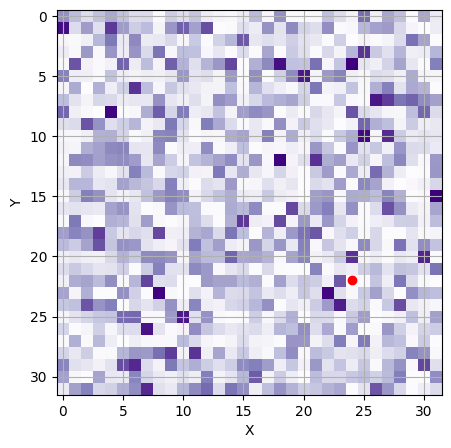

In [14]:
plot_map(y, poswin)

### 3. Cooperación entre neuronas próximas:

La función ``get_coop_area`` calcula la máscara gausiana, centrada en la neurona ganadora y de anchura $\sigma$, que se usará para determinar el aprendizaje de la red:

In [15]:
def get_coop_area(pos, poswin, sigma, wrap=False):
  sigma2 = sigma*sigma

  ny, nx, _ = pos.shape

  if wrap:
    da = np.abs(poswin[None, None, :] - pos)
    db = da.copy()
    db[:, :, 0] = nx - da[:, :, 0]
    db[:, :, 1] = ny - da[:, :, 1]
    d = np.minimum(da, db)
    d2 = np.sum(d*d, axis=2)
    h = np.exp(-0.5*d2/sigma2)
  else:
    d = poswin[None, None, :] - pos
    d2 = np.sum(d*d, axis=2)
    h = np.exp(-0.5*d2/sigma2)

  return h

A continuación se muestra gráficamente dicha máscara:

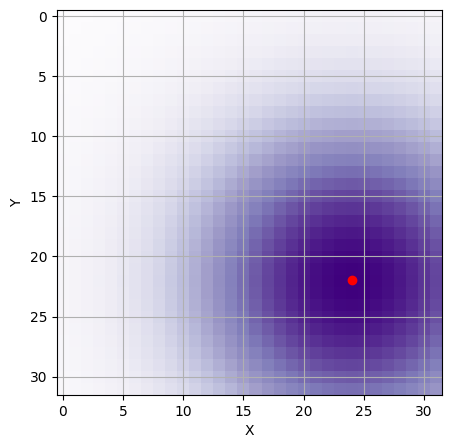

In [16]:
sigma = 10.0
h = get_coop_area(pos, poswin, sigma, wrap=False)
plot_map(h, poswin)

### 4. Adaptación de los pesos:

Finalmente, la función ``adjust_weights`` actualiza los pesos de la red, teniendo en cuenta el factor de aprendizaje (eta), la máscara gausiana (h) y el patrón de entrada (x):

In [17]:
def adjust_weights(eta, h, w, xin):
  delta = eta*h[:, :, None]*(xin - w)
  w += delta

  return w

Fijemos un valor alto del factor de aprendizaje y actualicemos los pesos:

In [18]:
eta = 0.8
w = adjust_weights(eta, h, w, xin)

Si volvemos a dibujar la respuesta de la red al mismo patrón de entrada, vemos que ahora los pesos de la neurona ganadora y sus vecinas se parecen más a $\mathbf{x}$:

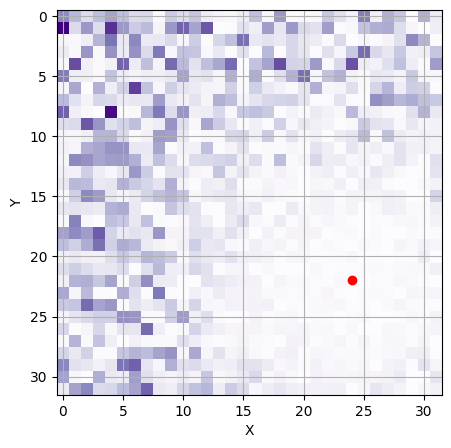

In [19]:
y, poswin = get_winner(xin, w)
plot_map(y, poswin)

### Algoritmo completo:

La función ``train_network`` implementa todos los pasos anteriores en un bucle:

In [20]:
def train_network(w, x, pos, niters=10000, sigma0=10.0, eta0=0.1, adapt=False, wrap=False):
  sigma = sigma0
  eta = eta0
  tau1 = niters/np.log(sigma0)
  tau2 = niters
  dim, npats = x.shape

  for i in range(niters):
    # Ajuste de los parametros eta y sigma:
    if adapt:
      sigma = sigma0*np.exp(-i/tau1)
      eta = eta0*np.exp(-i/tau2)

    # Elegimos ejemplo al azar:
    ix = np.random.randint(npats)
    xin = x[:, ix][None, None, :]

    # Obtenemos neurona ganadora:
    y, poswin = get_winner(xin, w)

    # Cooperacion entre neuronas:
    h = get_coop_area(pos, poswin, sigma, wrap=wrap)

    # Ajuste de pesos:
    w = adjust_weights(eta, h, w, xin)

  return w

La función ``plot_weights`` la usaremos para mostrar los pesos de la red y comprobar que ha aprendido:

In [21]:
def plot_weights(w, size=(8, 8)):

  plt.figure(figsize=size)

  ny, nx, dim = w.shape
  for i in range(ny):
    plt.plot(w[i, :, 0], w[i, :, 1], 'r-')
  for i in range(nx):
    plt.plot(w[:, i, 0], w[:, i, 1], 'r-')

  plt.plot(w[:, :, 0].ravel(), w[:, :, 1].ravel(), 'o')#, markersize=10)
  plt.grid(True)
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.axis([0, 1, 0, 1])

  plt.show()

Inicializamos la red:

In [30]:
nx = 32
ny = 32
pos, w = init_network(nx, ny, dim)

Mostramos los pesos iniciales, que obviamente no tienen ningún tipo de estructura:

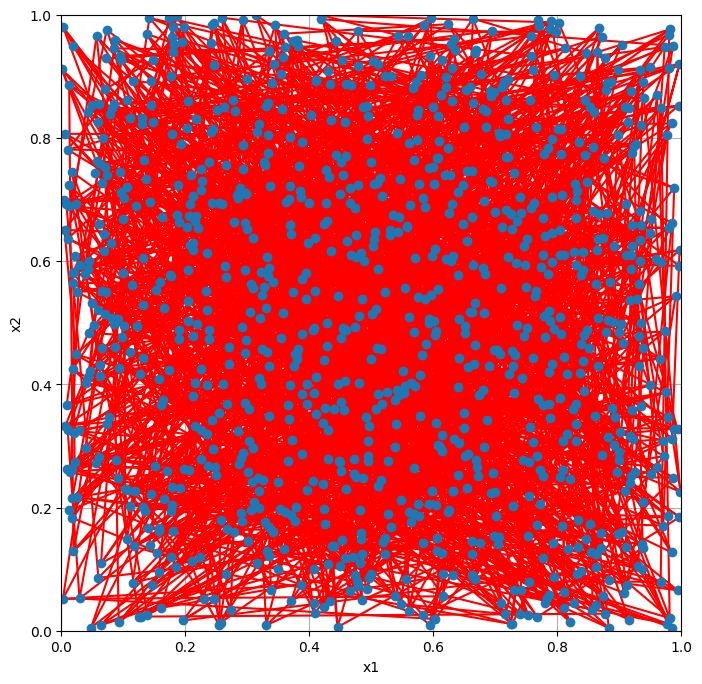

In [31]:
plot_weights(w)

Entrenamos la red durante 10000 iteraciones:

In [32]:
w = train_network(w, x, pos, sigma0=5.0)

Y volvemos a pintar los pesos:

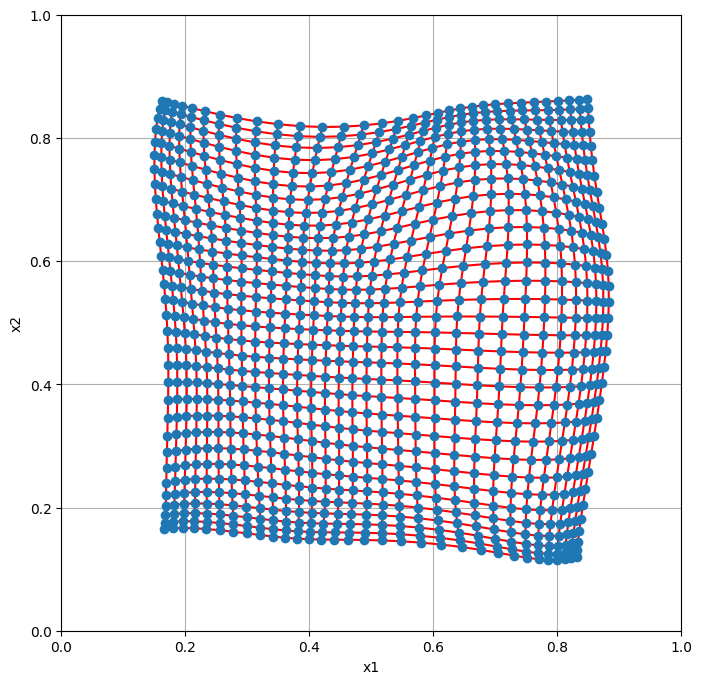

In [33]:
plot_weights(w)

Los puntos azules de la gráfica muestran los pesos de cada una de las neuronas de la red. Las líneas rojas conectan neuronas que son vecinas en la malla. Se observa que las neuronas se han organizado topológicamente, de modo que neuronas vecinas tienen pesos similares (y responden por tanto a patrones similares). Sin embargo los pesos de las neuronas no consiguen cubrir todo el espacio de entrada y hay regiones que se quedan en blanco.

A continuación se muestra otra forma de visualizar la red. En este caso estamos mostrando, para cada neurona de la malla, el valor de sus dos pesos con una escala de color. Se observa, igual que en la gráfica anterior, que ninguna neurona tiene pesos próximos a 0 o a 1.

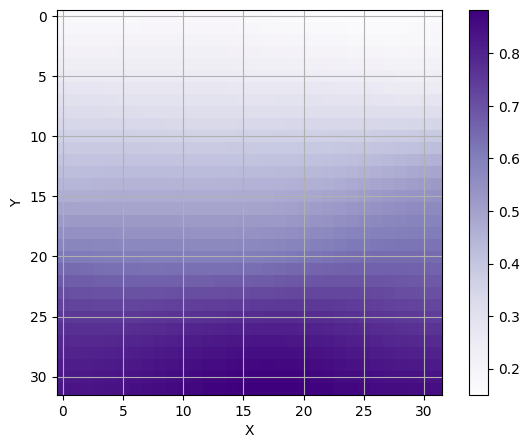

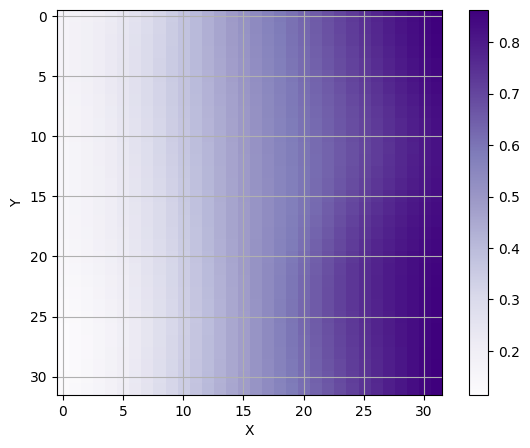

In [34]:
plot_map(w[:, :, 0], size=(7, 5), cbar=True)
plot_map(w[:, :, 1], size=(7, 5), cbar=True)

### Adaptación del learning rate y el sigma:

En los experimentos anteriores hemos usado un learning rate y una anchura de la gausiana constantes durante todo el entrenamiento de la red. Si hacemos que estos parámetros decrezcan a medida que la red aprende, podemos conseguir que la red cubra mejor todo el espacio de entrada.

A continuación se muestra un ejemplo (cambiamos el parámetro adapt a True en la llamada a train_network):


In [38]:
nx = 32
ny = 32
pos, w = init_network(nx, ny, dim)

In [39]:
w = train_network(w, x, pos, adapt=True)

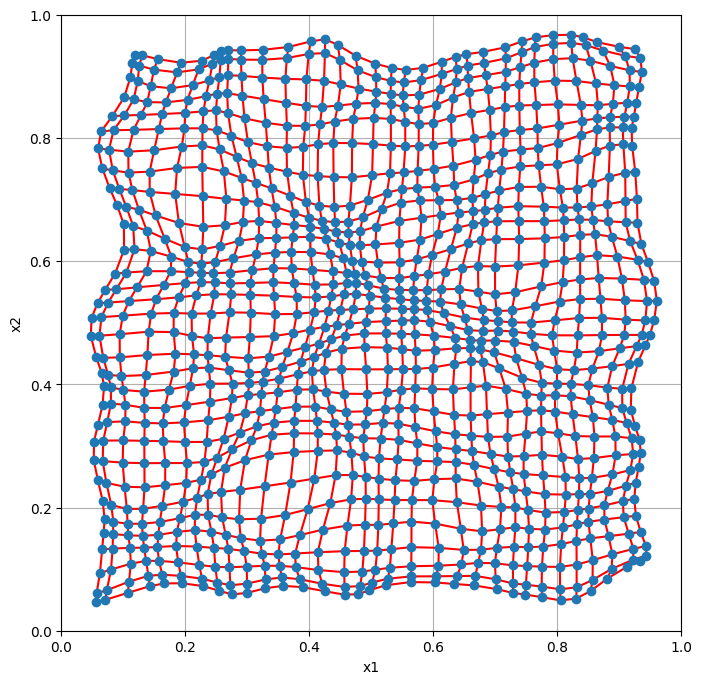

In [40]:
plot_weights(w)

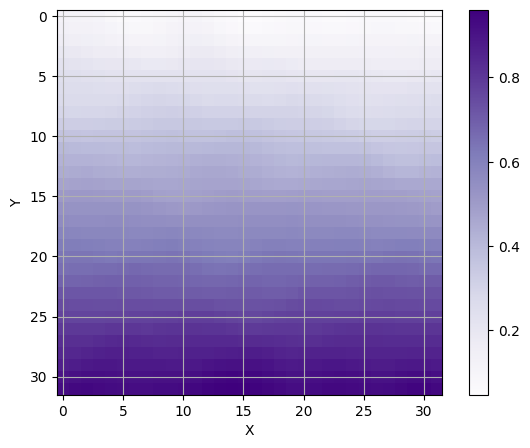

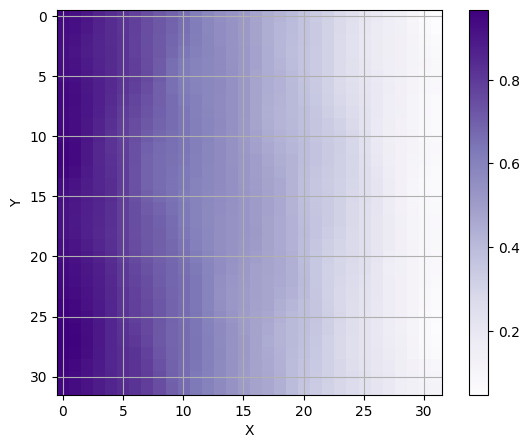

In [41]:
plot_map(w[:, :, 0], size=(7, 5), cbar=True)
plot_map(w[:, :, 1], size=(7, 5), cbar=True)

### Ejercicio:

Juega con los parámetros de la red para intentar conseguir que las neuronas cubran todo el espacio de pesos.

### Mapa en 1D:

Podemos hacer pruebas similares con una malla unidimensional:

In [42]:
nx = 512
ny = 1
pos, w = init_network(nx, ny, dim)

In [43]:
w = train_network(w, x, pos, adapt=True)

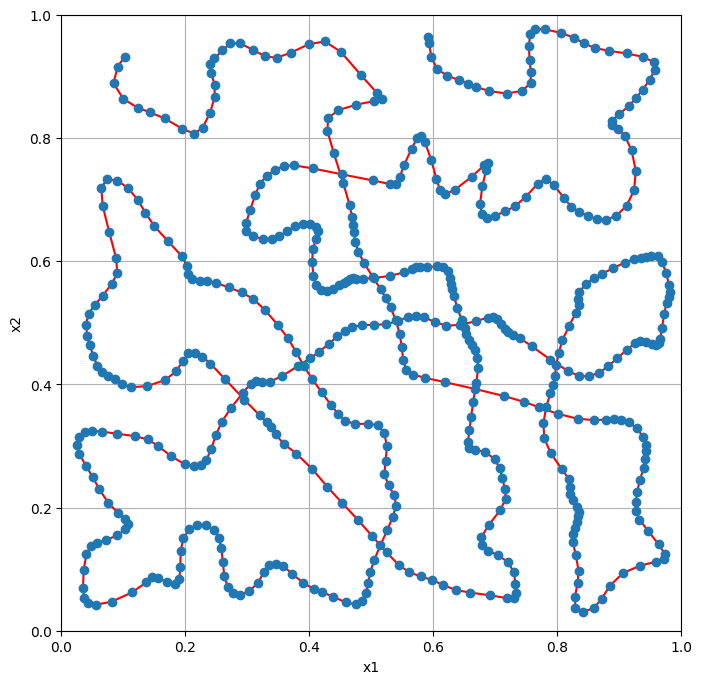

In [44]:
plot_weights(w)

Como vemos, ahora las neuronas se distribuyen a lo largo de una curva que intenta cubrir todo el espacio de entrada.

### Ejemplo 2. Codificando los colores:

Un ejemplo típico de aplicación de redes de Kohonen es el entrenamiento de una red para aprender una representación bidimensional de colores en formato RGB. El ejemplo que se muestra a continuación genera colores aleatorios para entrenar la red.

In [45]:
npats = 10000
dim = 3
x = np.random.rand(dim, npats)

Inicializamos la red con una malla de 64x64 neuronas:

In [46]:
nx = 64
ny = 64
pos, w = init_network(nx, ny, dim)

Pintamos los pesos de cada neurona de la red como un color. Inicialmente, como los pesos son aleatorios, la red no está organizada:

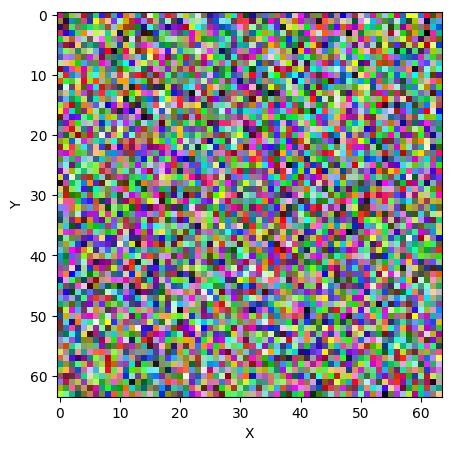

In [47]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

ax.imshow(w)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

Entrenamos la red durante 10000 épocas y volvemos a pintar los pesos:

In [48]:
w = train_network(w, x, pos, adapt=True, wrap=True)

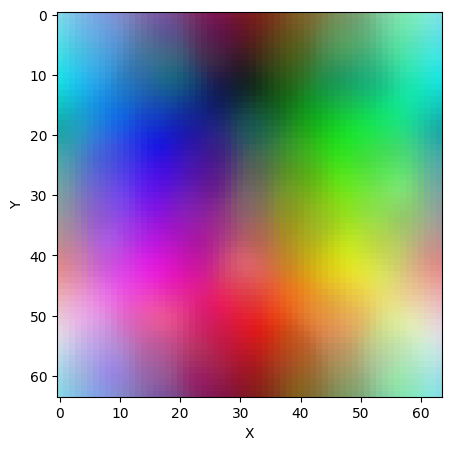

In [49]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

ax.imshow(w)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

Como vemos, la red se ha autoorganizado para que neuronas próximas respondan a colores similares.

### Ejemplo 3: MNIST:

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


In [52]:
x = train_images.reshape(60000, 784).transpose()
dim = 784

In [53]:
nx = 32
ny = 32
pos, w = init_network(nx, ny, dim)

In [54]:
w = train_network(w, x, pos, adapt=True)

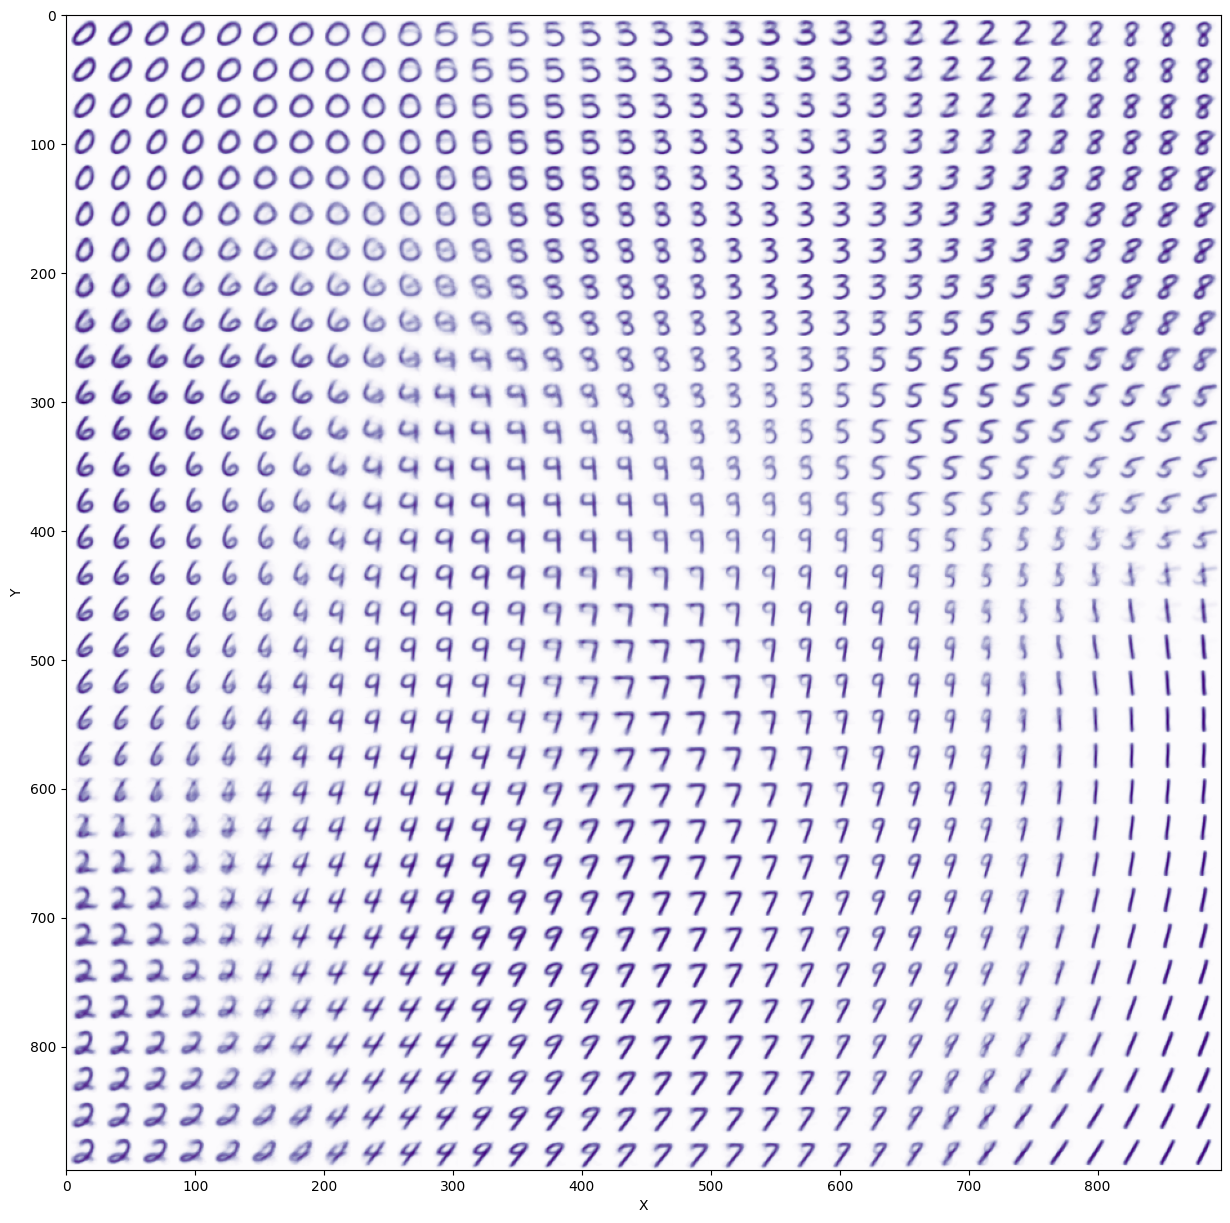

In [55]:
delta = 1

ims = w.reshape(ny, nx, 28, 28)

c = ims[0, 0]
for i in range(delta, nx, delta):
  c = np.concatenate((c, ims[0, i]), axis=1)
for j in range(delta, ny, delta):
  q = ims[j, 0]
  for i in range(delta, nx, delta):
    q = np.concatenate((q, ims[j, i]), axis=1)
  c = np.concatenate((c, q), axis=0)

fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax.imshow(c, cmap='Purples')
#plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

### Ejercicio:

Entrenar una red neuronal para clasificar las imágenes de MNIST usando como características el conjunto de distancias a las neuronas de la red de Kohonen. ¿Resultan útiles estas características para resolver el problema?

### Ejemplo 4: Persons:

Dataset https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

Eliminamos la primera columna (sexo) porque es una variable categórica.

In [57]:
data = np.loadtxt("500_Person.csv", delimiter=",")
data = data.transpose()
x = data[1:, :]

In [58]:
dim, npats = x.shape
nx = 32
ny = 32
pos, w = init_network(nx, ny, dim)

In [59]:
w = train_network(w, x, pos, adapt=True)

height


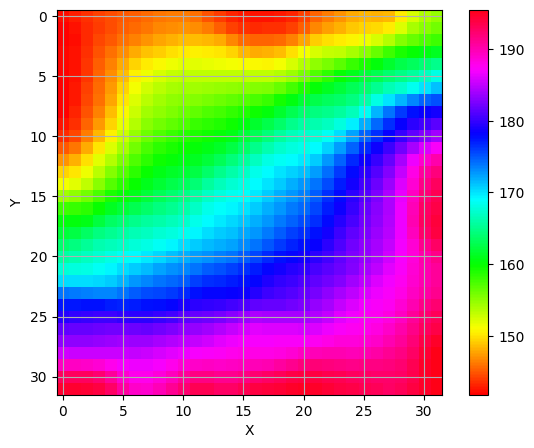

weight


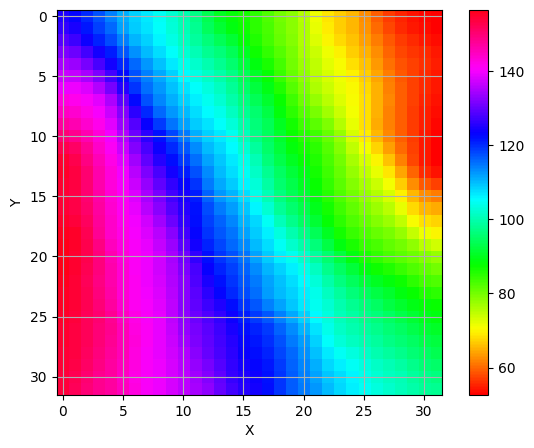

index


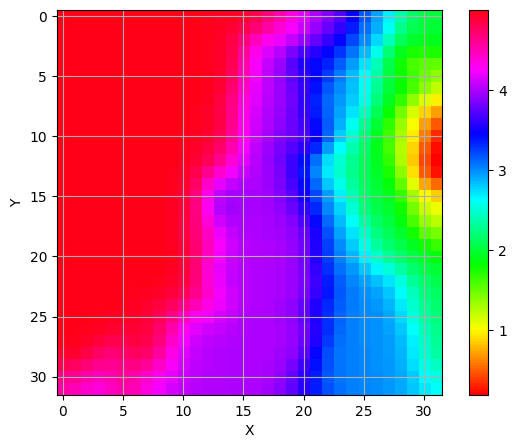

In [60]:
print("height")
plot_map(w[:, :, 0], colormap="hsv", size=(7, 5), cbar=True)
print("weight")
plot_map(w[:, :, 1], colormap="hsv", size=(7, 5), cbar=True)
print("index")
plot_map(w[:, :, 2], colormap="hsv", size=(7, 5), cbar=True)

### Problema del viajante:

Supongamos que los puntos en un espacio 2D representan posiciones de ciudades. ¿Es posible utilizar una red de Kohonen unidimensional para aproximar la solución del problema del viajante?

In [61]:
npats = 15
dim = 2
x = np.random.rand(dim, npats)

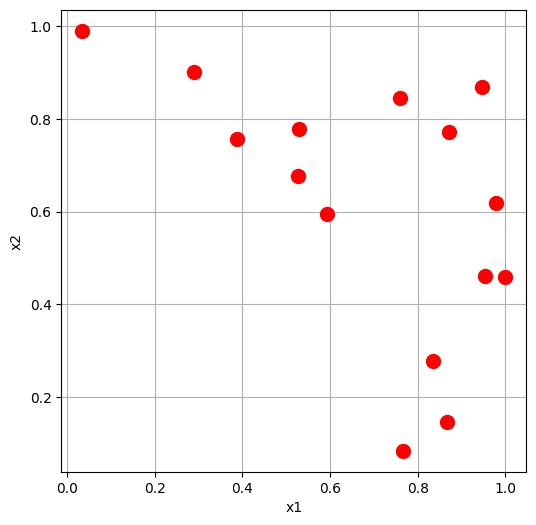

In [62]:
plt.figure(figsize=(6,6))

plt.plot(x[0], x[1], 'ro', markersize=10)
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

In [63]:
nx = 100
ny = 1
pos, w = init_network(nx, ny, dim)

In [64]:
w = train_network(w, x, pos, niters=20000, sigma0=50.0, eta0=0.05, adapt=True, wrap=True)

In [65]:
def plot_weights_with_points(w, x, size=(8, 8), annotate=False):

  plt.figure(figsize=size)

  ny, nx, dim = w.shape
  for i in range(ny):
    plt.plot(w[i, :, 0], w[i, :, 1], 'r-')
  for i in range(nx):
    plt.plot(w[:, i, 0], w[:, i, 1], 'r-')

  plt.plot(w[:, :, 0].ravel(), w[:, :, 1].ravel(), '.')
  plt.plot(x[0], x[1], 'ro', markersize=10)

  if annotate==True:
    for i, xx in enumerate(x.transpose()):
      plt.annotate("%d" % i, (xx[0], xx[1]), fontsize=20)

  plt.grid(True)
  plt.xlabel("x1")
  plt.ylabel("x2")

  plt.show()

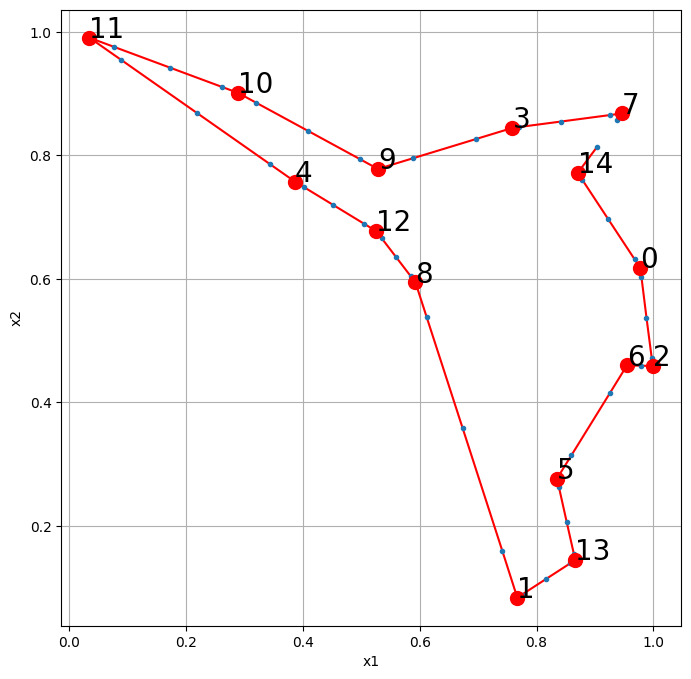

In [66]:
plot_weights_with_points(w, x, annotate=True)

Apliquemos esta idea a un ejemplo concreto del problema del viajante (con ciudades reales).

http://www.math.uwaterloo.ca/tsp/index.html

Cargamos datos (Djibouti, 38 ciudades):

In [67]:
data = np.loadtxt('dj38.txt', delimiter=' ')

In [68]:
data

array([[1.00000000e+00, 1.10036111e+04, 4.21025000e+04],
       [2.00000000e+00, 1.11086111e+04, 4.23738889e+04],
       [3.00000000e+00, 1.11333333e+04, 4.28858333e+04],
       [4.00000000e+00, 1.11558333e+04, 4.27125000e+04],
       [5.00000000e+00, 1.11833333e+04, 4.29333333e+04],
       [6.00000000e+00, 1.12975000e+04, 4.28533333e+04],
       [7.00000000e+00, 1.13102778e+04, 4.29294444e+04],
       [8.00000000e+00, 1.14166667e+04, 4.29833333e+04],
       [9.00000000e+00, 1.14238889e+04, 4.30002778e+04],
       [1.00000000e+01, 1.14383333e+04, 4.20572222e+04],
       [1.10000000e+01, 1.14611111e+04, 4.32527778e+04],
       [1.20000000e+01, 1.14855556e+04, 4.31872222e+04],
       [1.30000000e+01, 1.15030556e+04, 4.28552778e+04],
       [1.40000000e+01, 1.15113889e+04, 4.21063889e+04],
       [1.50000000e+01, 1.15222222e+04, 4.28419444e+04],
       [1.60000000e+01, 1.15694444e+04, 4.31366667e+04],
       [1.70000000e+01, 1.15833333e+04, 4.31500000e+04],
       [1.80000000e+01, 1.15950

Pintamos ciudades:

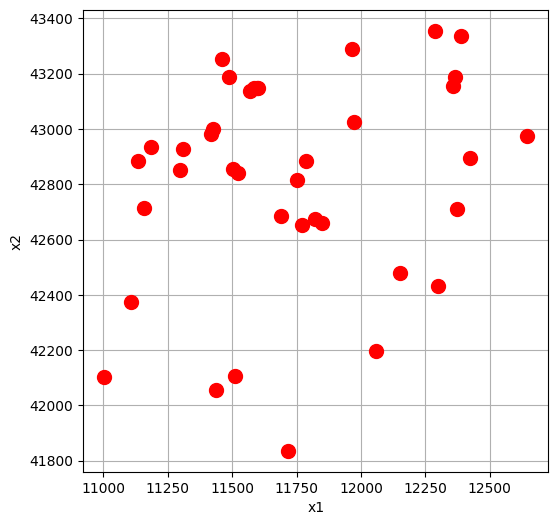

In [69]:
x = data[:, 1:].transpose()

plt.figure(figsize=(6, 6))

plt.plot(x[0], x[1], 'ro', markersize=10)
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

Entrenamos modelo:

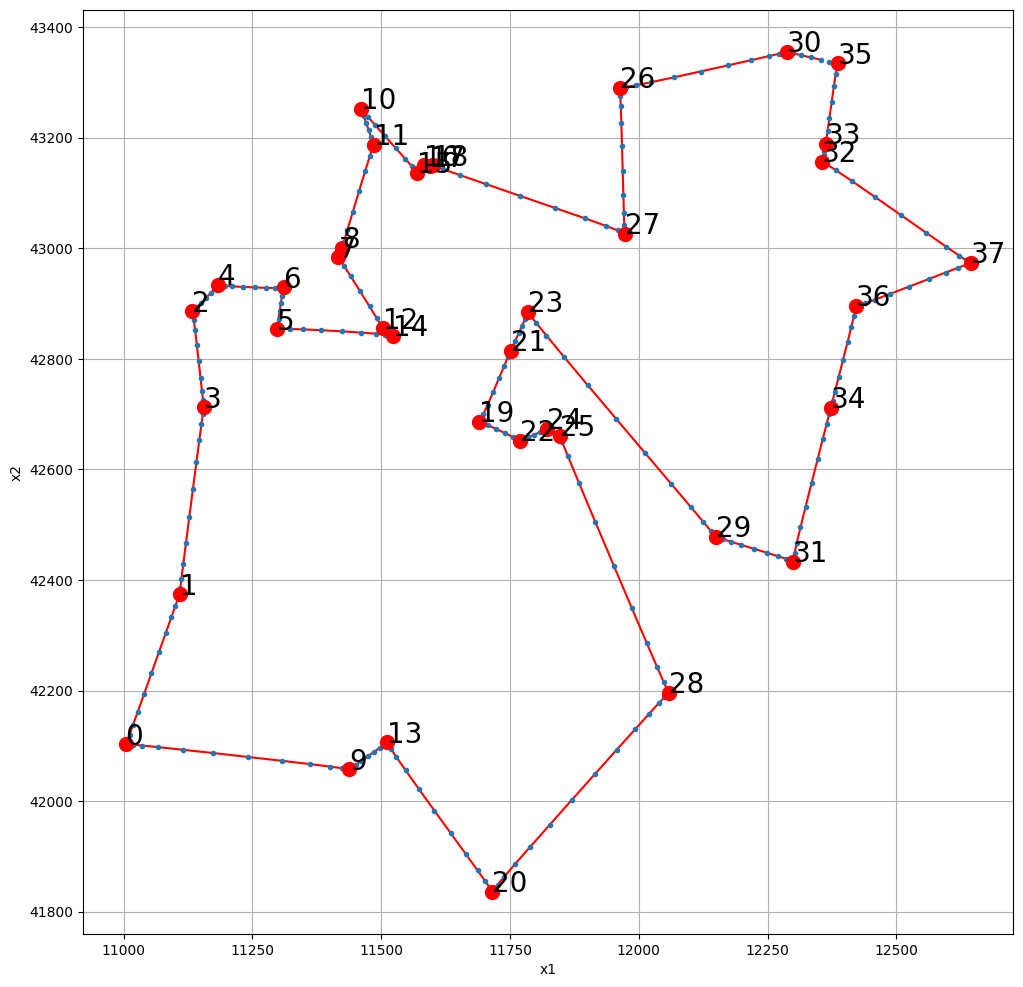

In [70]:
nx = 500
ny = 1
pos, w = init_network(nx, ny, dim)

w = train_network(w, x, pos, niters=20000, sigma0=50.0, eta0=0.05, adapt=True, wrap=True)

plot_weights_with_points(w, x, size=(12, 12), annotate=True)

Ahora obtenemos la ruta:

In [71]:
# Ganador para cada una de las ciudades:
winners = []
for p in x.transpose():
  xin = p.transpose()[None, None, :]
  _, poswin = get_winner(xin, w)
  winners.append(poswin[0])
winners = np.array(winners)

In [72]:
winners

array([260, 278, 309, 295, 321, 346, 334, 381, 388, 243, 411, 400, 369,
       229, 361, 424, 432, 440, 446, 145, 212, 132, 156, 119, 166, 175,
       476, 461, 191, 100, 492,  85,  25,  16,  69,   4,  55,  40])

Ordenamos para ver el orden en que se recorren:

In [73]:
recorrido = np.argsort(winners)
print(recorrido)

[35 33 32 37 36 34 31 29 23 21 19 22 24 25 28 20 13  9  0  1  3  2  4  6
  5 14 12  7  8 11 10 15 16 17 18 27 26 30]


Y calculamos la longitud del camino:

In [74]:
xx = x.transpose()
total = 0
for a, b in zip(recorrido, np.roll(recorrido, -1)):
  p = xx[a] - xx[b]
  distancia = np.sqrt(np.sum(p*p))
  print(f"{a} --> {b}: {distancia}")
  total += distancia

print(f"Distancia total = {total}")

optimo = 6656
print(total/optimo)

35 --> 33: 147.41387701233728
33 --> 32: 33.624904056966884
32 --> 37: 342.2378311646007
37 --> 36: 236.48918264094004
36 --> 34: 190.54526478530127
34 --> 31: 287.42220663024597
31 --> 29: 156.90024244802825
29 --> 23: 546.0961977957003
23 --> 21: 77.89328205236947
21 --> 19: 141.40052757164565
19 --> 22: 86.95554778235896
22 --> 24: 56.79521008755992
24 --> 25: 27.46762887127465
25 --> 28: 510.7937617504838
28 --> 20: 496.49430870881935
20 --> 13: 338.8917258715504
13 --> 9: 88.05955416790452
9 --> 0: 437.07375847296123
0 --> 1: 290.99301545433866
1 --> 3: 341.88801268259067
3 --> 2: 174.78753642319424
2 --> 4: 68.96557112066861
4 --> 6: 127.00405357097814
6 --> 5: 77.17623802732474
5 --> 14: 225.01060911888138
14 --> 12: 23.348192887675538
12 --> 7: 154.47088115065145
7 --> 8: 18.419453115936257
8 --> 11: 196.85271291056003
11 --> 10: 69.96477879341072
10 --> 15: 158.80142137934564
15 --> 16: 19.2530109878937
16 --> 17: 11.827619382191655
17 --> 18: 5.36476386805619
18 --> 27: 393.0

Otro problema (Luxemburgo, 980 ciudades):

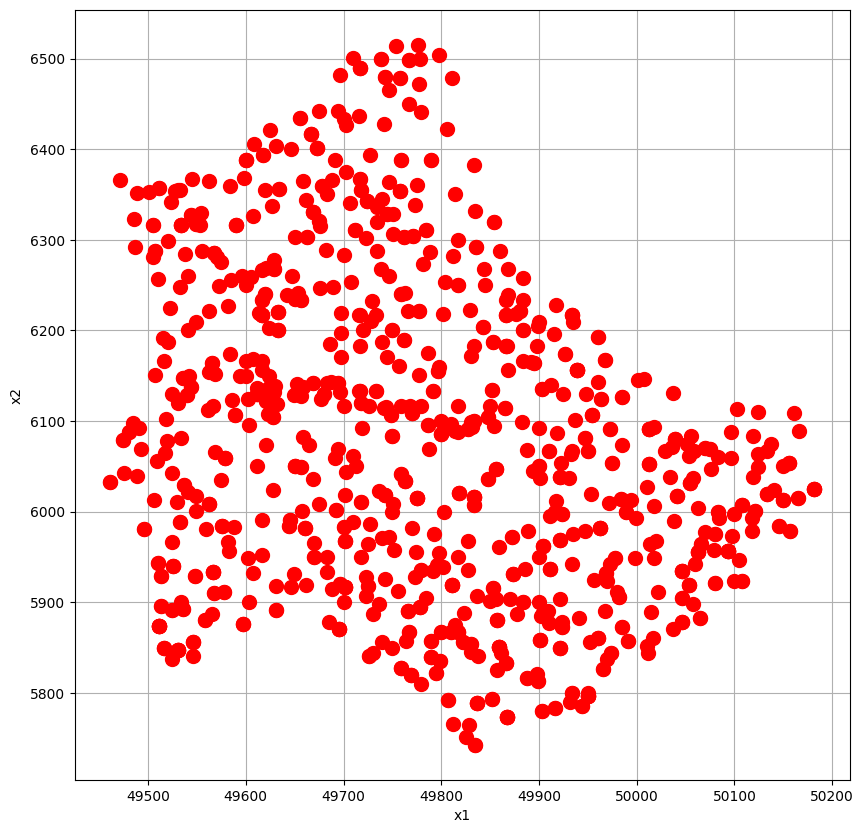

In [75]:
data = np.loadtxt('lu980.txt', delimiter=' ')
x = data[:, 1:].transpose()
plt.figure(figsize=(10, 10))

plt.plot(x[0], x[1], 'ro', markersize=10)
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

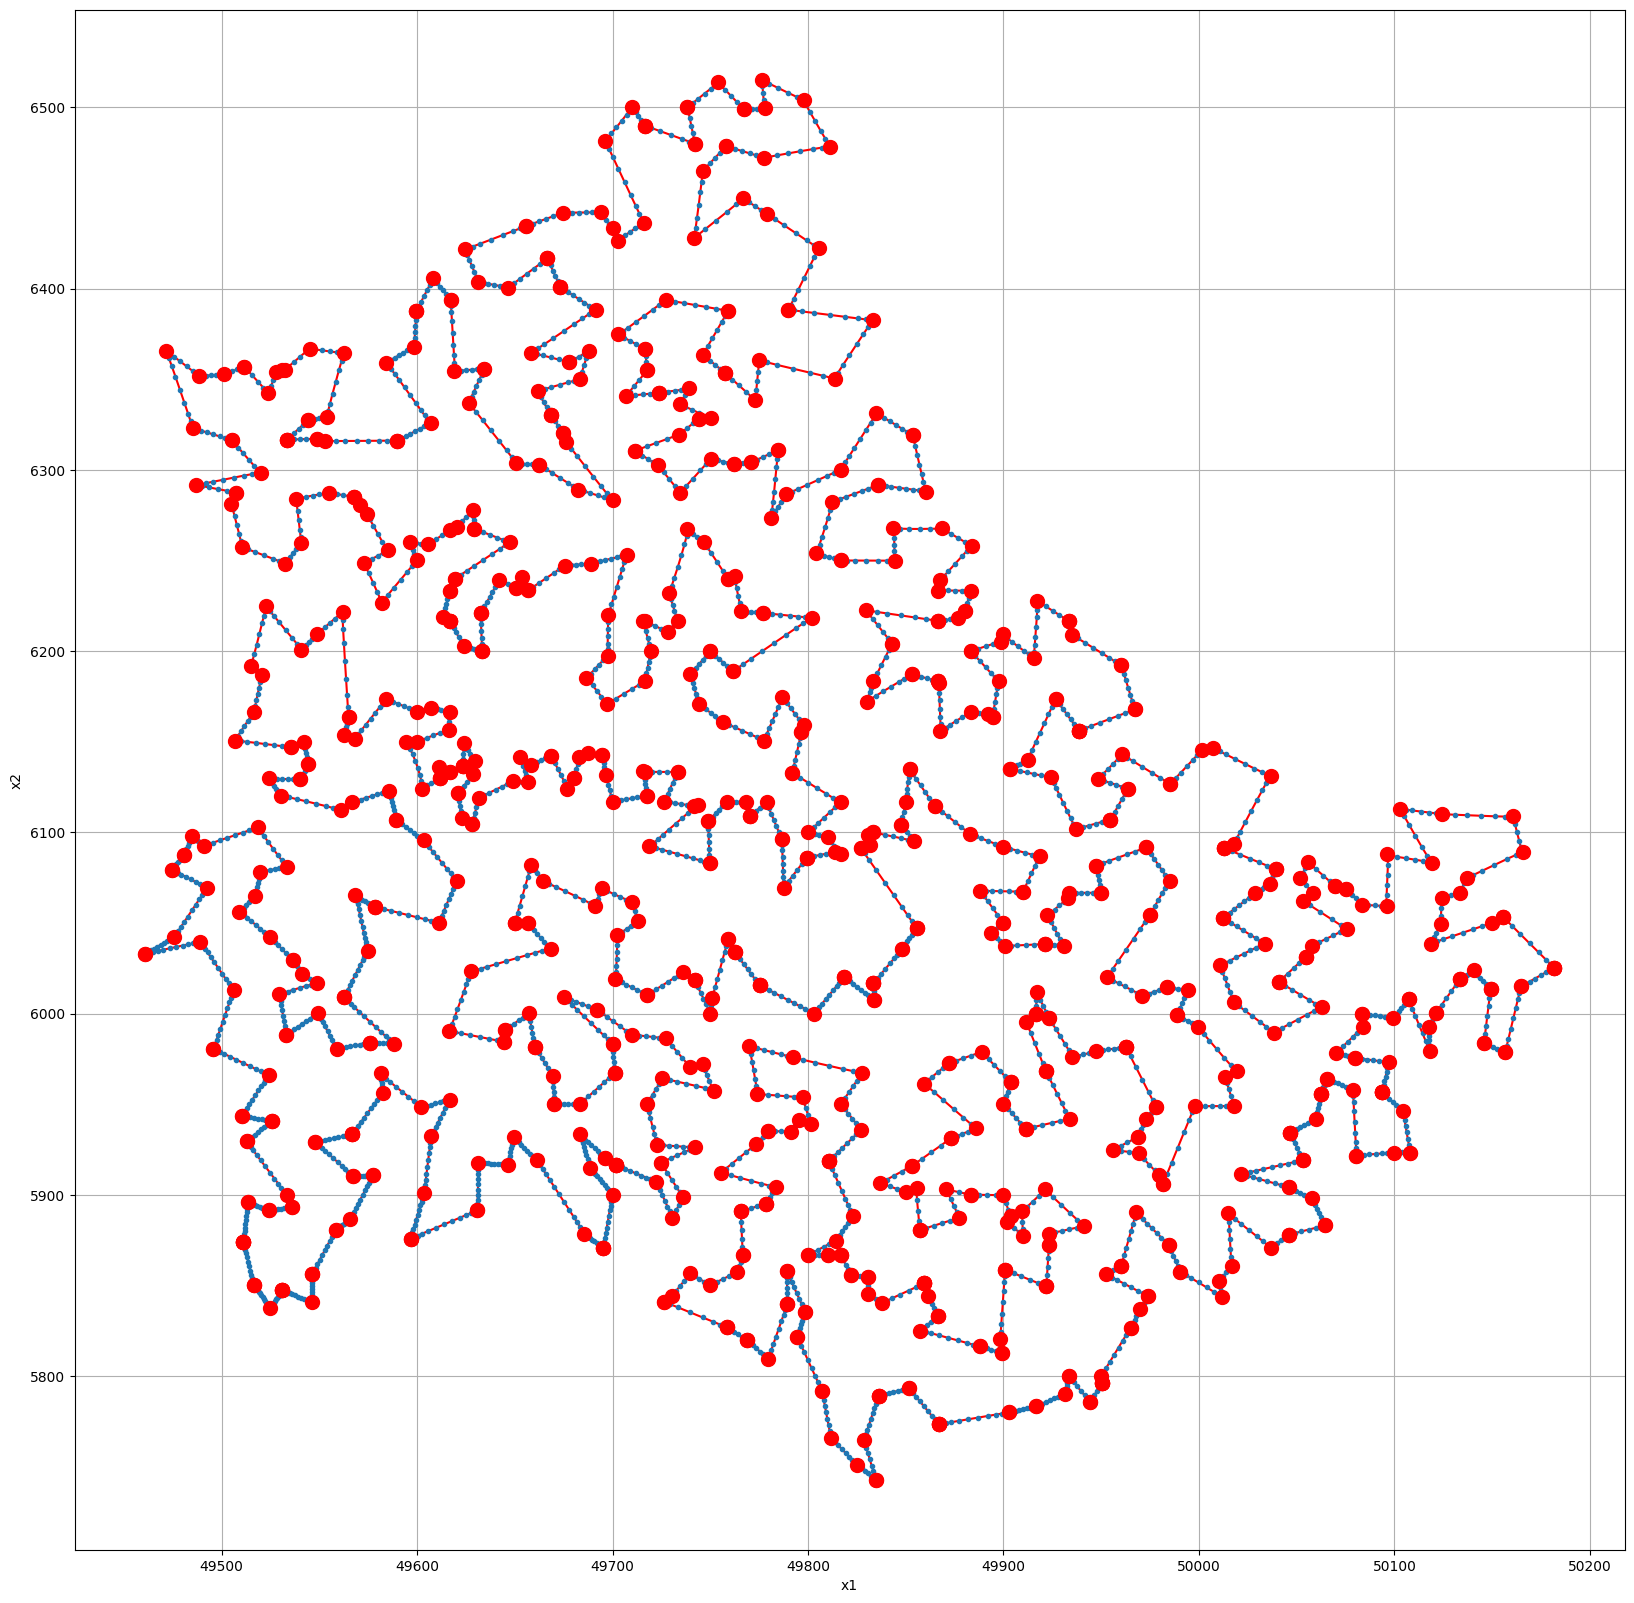

In [76]:
nx = 10000  # 4 minutos
#nx = 5000  # 1 minuto
ny = 1
pos, w = init_network(nx, ny, dim)

w = train_network(w, x, pos, niters=200000, sigma0=200.0, eta0=0.2, adapt=True, wrap=True) # Para nx = 10000
#w = train_network(w, x, pos, niters=100000, sigma0=200.0, eta0=0.1, adapt=True, wrap=True) # Para nx = 5000

plot_weights_with_points(w, x, size=(20, 20))

In [77]:
# Ganador para cada una de las ciudades:
winners = []
for p in x.transpose():
  xin = p.transpose()[None, None, :]
  _, poswin = get_winner(xin, w)
  winners.append(poswin[0])
winners = np.array(winners)

# Ordenamos para ver en que orden se recorren:
recorrido = np.argsort(winners)

# Calculamos la longitud del camino:
xx = x.transpose()
total = 0
for a, b in zip(recorrido, np.roll(recorrido, -1)):
  p = xx[a] - xx[b]
  distancia = np.sqrt(np.sum(p*p))
  #print(f"{a} --> {b}: {distancia}")
  total += distancia

print(f"Distancia total = {total}")

optimo = 11340
print(total/optimo)

Distancia total = 11973.005742617894
1.0558206122238


In [78]:
# Si para varias ciudades el ganador es el mismo, estas se recorren en un orden arbitrario...
np.unique(winners).shape

(634,)

### MNIST con las características de Kohonen:

In [79]:
import tensorflow as tf
from tensorflow import keras

Modelo entrenado con las imágenes:

In [80]:
# Volvemos a crear el modelo para que se empiece a entrenar desde 0:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28), name="entrada"))
model.add(keras.layers.Dense(30, activation="relu", name="oculta"))
model.add(keras.layers.Dense(10, activation="softmax", name="salida"))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Entrenamiento del modelo:
history = model.fit(train_images,
                    train_labels,
                    epochs=100,
                    validation_data=(test_images, test_labels),
                    batch_size=1000)

Epoch 1/100
60/60 [==============================] - 1s 11ms/step - loss: 12.6614 - acc: 0.2562 - val_loss: 2.0714 - val_acc: 0.2991
Epoch 2/100
60/60 [==============================] - 0s 8ms/step - loss: 1.8959 - acc: 0.3611 - val_loss: 1.7927 - val_acc: 0.3992
Epoch 3/100
60/60 [==============================] - 0s 8ms/step - loss: 1.6823 - acc: 0.4189 - val_loss: 1.6286 - val_acc: 0.4434
Epoch 4/100
60/60 [==============================] - 0s 8ms/step - loss: 1.5366 - acc: 0.4670 - val_loss: 1.4807 - val_acc: 0.5102
Epoch 5/100
60/60 [==============================] - 0s 7ms/step - loss: 1.3769 - acc: 0.5442 - val_loss: 1.3092 - val_acc: 0.5824
Epoch 6/100
60/60 [==============================] - 0s 8ms/step - loss: 1.2413 - acc: 0.5900 - val_loss: 1.2049 - val_acc: 0.6138
Epoch 7/100
60/60 [==============================] - 0s 8ms/step - loss: 1.1532 - acc: 0.6174 - val_loss: 1.1291 - val_acc: 0.6362
Epoch 8/100
60/60 [==============================] - 0s 7ms/step - loss: 1.0707 -

Red de Kohonen:

In [81]:
xtrain = train_images.reshape(-1, 784).transpose()
xtest = test_images.reshape(-1, 784).transpose()
dim = 784

nx = 8
ny = 8
pos, w = init_network(nx, ny, dim)

w = train_network(w, xtrain, pos, adapt=True)

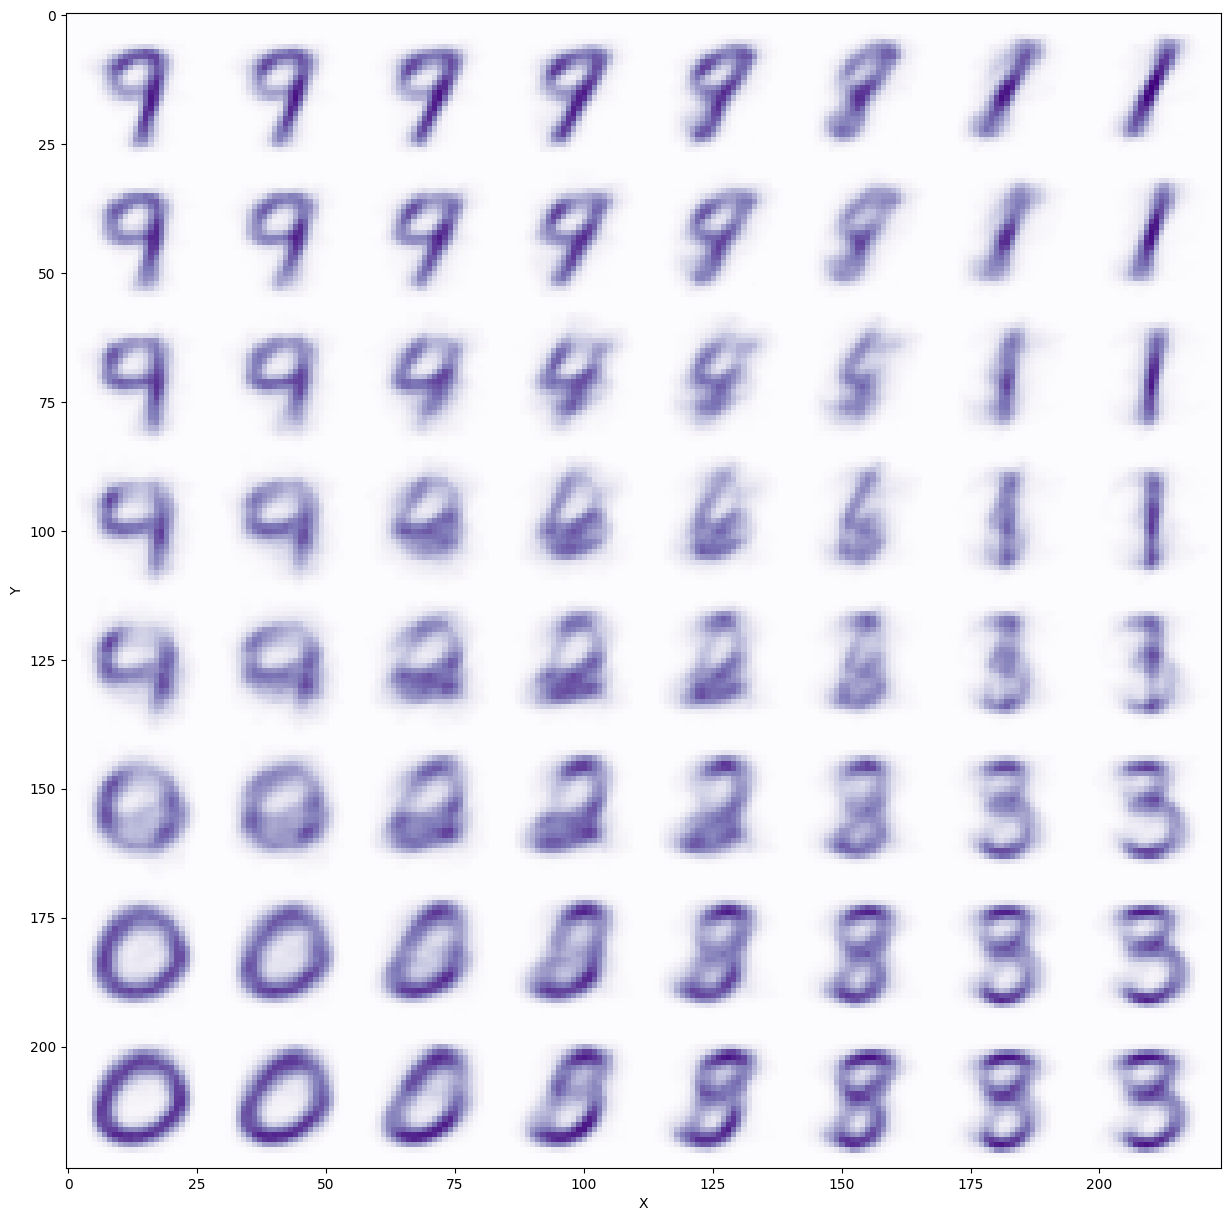

In [82]:
delta = 1

ims = w.reshape(ny, nx, 28, 28)

c = ims[0, 0]
for i in range(delta, nx, delta):
  c = np.concatenate((c, ims[0, i]), axis=1)
for j in range(delta, ny, delta):
  q = ims[j, 0]
  for i in range(delta, nx, delta):
    q = np.concatenate((q, ims[j, i]), axis=1)
  c = np.concatenate((c, q), axis=0)

fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax.imshow(c, cmap='Purples')
#plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [83]:
w = w.reshape(-1, 784)
w.shape

(64, 784)

In [84]:
xtrain.shape

(784, 60000)

In [85]:
xtest.shape

(784, 10000)

Distancias de cada imagen a cada neurona de la red:

In [86]:
from scipy.spatial.distance import cdist

In [87]:
dtrain = cdist(xtrain.transpose(), w)
dtrain.shape

(60000, 64)

In [88]:
dtest = cdist(xtest.transpose(), w)
dtest.shape

(10000, 64)

Ahora usaremos d para entrenar la red:

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dtrain_std = scaler.fit_transform(dtrain)
dtest_std = scaler.transform(dtest)

In [90]:
# Volvemos a crear el modelo para que se empiece a entrenar desde 0:
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_shape=(64,), activation="relu", name="oculta1"))
model.add(keras.layers.Dense(30, activation="relu", name="oculta2"))
model.add(keras.layers.Dense(10, activation="softmax", name="salida"))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Entrenamiento del modelo:
history = model.fit(dtrain_std,
                    train_labels,
                    epochs=100,
                    validation_data=(dtest_std, test_labels),
                    batch_size=1000)

Epoch 1/100
60/60 [==============================] - 2s 12ms/step - loss: 1.5755 - acc: 0.4547 - val_loss: 1.0663 - val_acc: 0.6164
Epoch 2/100
60/60 [==============================] - 0s 8ms/step - loss: 0.8915 - acc: 0.6848 - val_loss: 0.7459 - val_acc: 0.7372
Epoch 3/100
60/60 [==============================] - 0s 8ms/step - loss: 0.6960 - acc: 0.7593 - val_loss: 0.6291 - val_acc: 0.7832
Epoch 4/100
60/60 [==============================] - 0s 8ms/step - loss: 0.6012 - acc: 0.7937 - val_loss: 0.5493 - val_acc: 0.8127
Epoch 5/100
60/60 [==============================] - 0s 8ms/step - loss: 0.5326 - acc: 0.8194 - val_loss: 0.4928 - val_acc: 0.8317
Epoch 6/100
60/60 [==============================] - 0s 8ms/step - loss: 0.4810 - acc: 0.8385 - val_loss: 0.4487 - val_acc: 0.8486
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.4413 - acc: 0.8531 - val_loss: 0.4150 - val_acc: 0.8624
Epoch 8/100
60/60 [==============================] - 0s 5ms/step - loss: 0.4113 - 

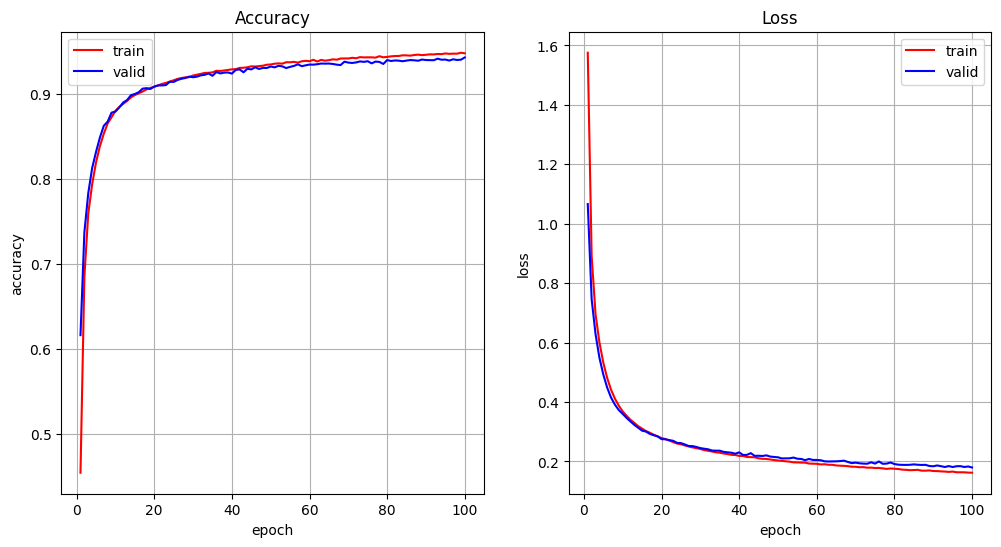

In [91]:
hd = history.history

epochs = range(1, 100+1)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, hd['acc'], "r", label="train")
plt.plot(epochs, hd['val_acc'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hd['loss'], "r", label="train")
plt.plot(epochs, hd['val_loss'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss")
plt.legend()

plt.show()